In [1]:
import os
import math
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

c:\program files\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def parseRawData(frames, indices, filePath, windowSize):
    files = os.listdir(filePath)
    for index in indices:
        matTemp = pd.read_csv(os.path.join(filePath, files[index]), header = None, sep = ' ').values.reshape(1, -1)
        chunkSize = matTemp.shape[1]//(3*windowSize)
        matTemp = matTemp[0, 0:(chunkSize*3*windowSize)].reshape(chunkSize, 3*windowSize)
        frames.append(matTemp)
    return frames

In [3]:
def createData(frames, data):
    for i in range(len(frames)):
        data = np.concatenate((data, frames[i]), axis = 0)
    return data

In [4]:
def splitTrainingTest(windowSize, fraction = 0.8):
    traframes = []
    tesframes = []
    traData = np.empty((0,3*windowSize), dtype=int)
    tesData = np.empty((0,3*windowSize), dtype=int)
    traN = []
    tesN = []
    classList = [i for i in os.listdir() if '.' not in i and 'MODEL' not in i]
    for classValue in classList:
        filePath = os.path.join(os.getcwd(), classValue)
        files = os.listdir(filePath)
        if len(files) <= 4:
            traIndices = np.random.choice(len(files), len(files) - 1, replace = False)
        else:
            traIndices = np.random.choice(len(files), math.ceil(fraction * len(files)), replace = False)
        tesIndices = [i for i in range(len(files)) if i not in traIndices]
        traFrames = parseRawData(traframes, traIndices, filePath, windowSize)
        tesFrames = parseRawData(tesframes, tesIndices, filePath, windowSize)
        traN.append(len(traIndices))
        tesN.append(len(tesIndices))
    traData = createData(traFrames, traData)
    tesData = createData(tesFrames, tesData)
    return traData, traFrames, tesData, tesFrames, traN, tesN, classList

In [5]:
def createX(frames, cluster, k):
    end = frames[0].shape[0]
    X = np.array([np.histogram(cluster[0:end],bins=list(range(0,k + 1)))[0]])
    for i in range(1,len(frames)):
        start = end
        end += frames[i].shape[0]
        X = np.concatenate((X, np.histogram(cluster[start:end], bins=list(range(k + 1)))[0].reshape(1,-1)), axis=0)
    return X

In [6]:
def createY(N, Y):
    classValue = 0
    for i in range(len(N)):
        for j in range(N[i]):
            Y.append(classValue)
        classValue += 1
    return np.array(Y).reshape(-1,)

In [7]:
def vectorQuantization(k, traData, traFrames, tesData, tesFrames, traN, tesN):
    k_mean = KMeans(n_clusters = k)
    k_mean.fit(traData)
    cluster = k_mean.labels_
    predict = k_mean.predict(tesData)
    y_train = []
    y_test = []
    X_train = createX(traFrames, cluster, k)
    y_train = createY(traN, y_train)
    X_test = createX(tesFrames, predict, k)
    y_test = createY(tesN, y_test)
    return X_train, y_train, X_test, y_test

In [8]:
def plotConfusionMatrix(y_true, y_pred, classList, clfName):
    cm=confusion_matrix(y_true, y_pred)
    fig=plt.figure(figsize=(9, 9))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.title('Confusion Matrix - {}'.format(clfName))
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = range(len(classList))
    plt.xticks(tick_marks, classList, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classList, fontsize=12)
    plt.show()

Window Size: 32, K: 110


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  RF Accuracy: 0.7575757575757576


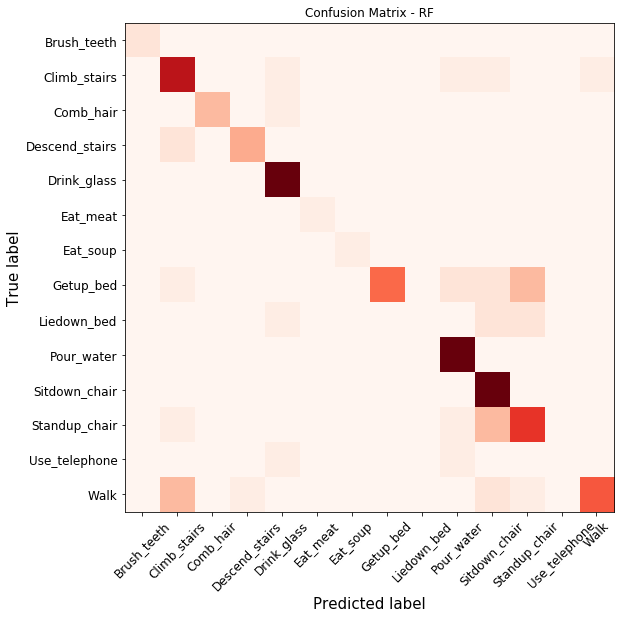

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  SVM Accuracy: 0.7393939393939394


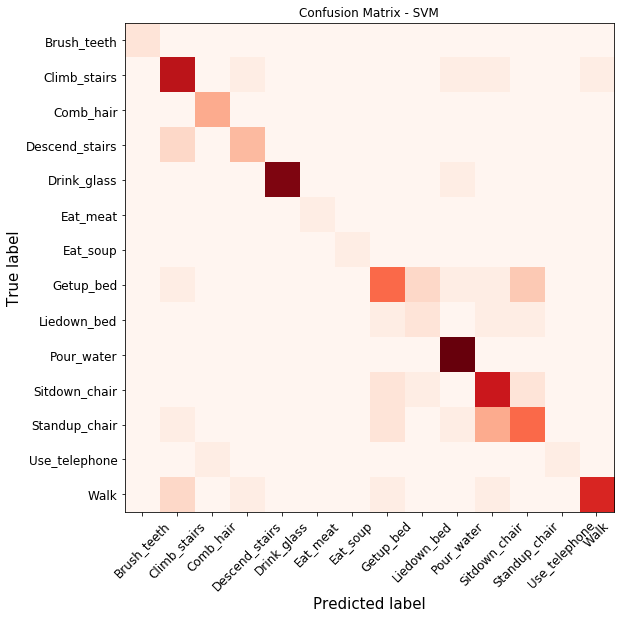

  GNB Accuracy: 0.6121212121212121


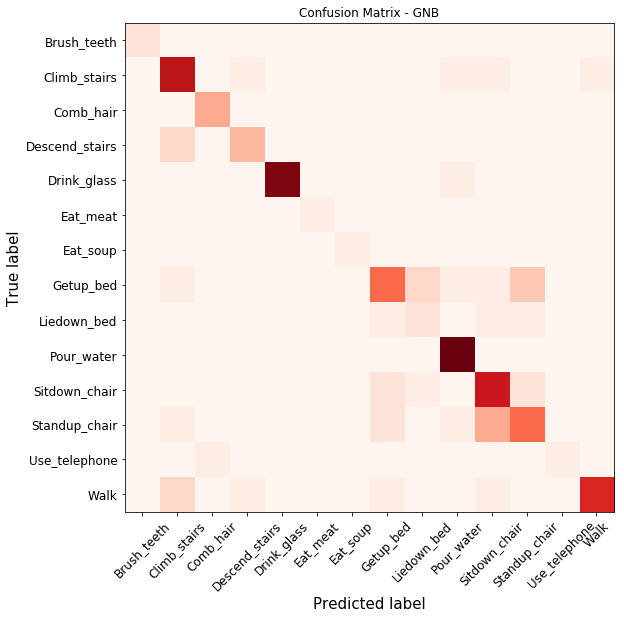

  MNB Accuracy: 0.7151515151515152


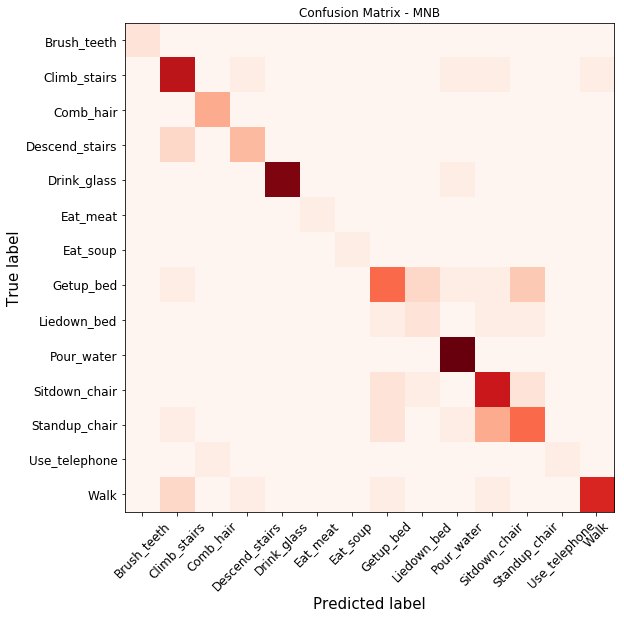

Window Size: 32, K: 115


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  RF Accuracy: 0.7212121212121212


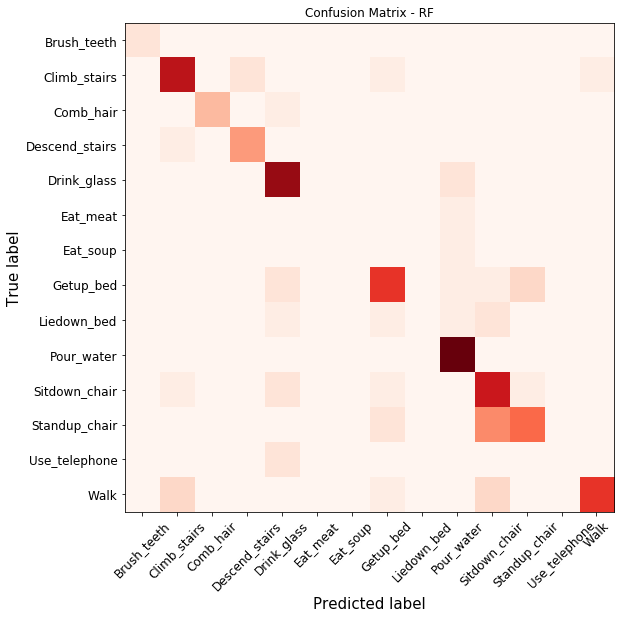

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  SVM Accuracy: 0.7393939393939394


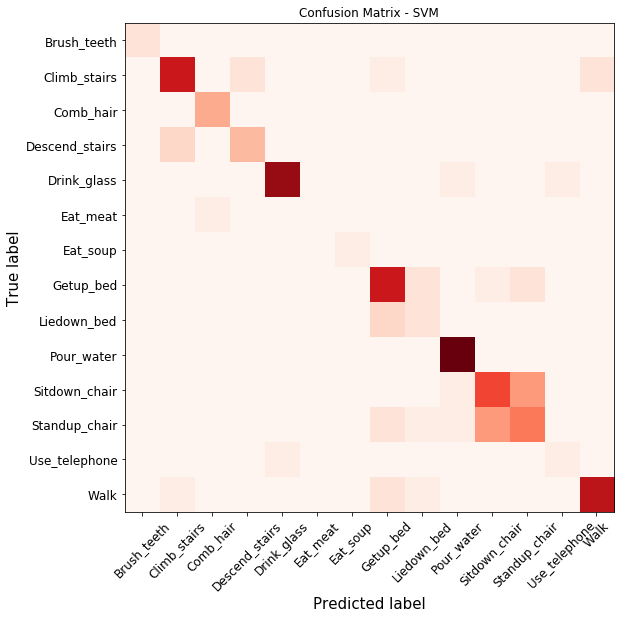

  GNB Accuracy: 0.5515151515151515


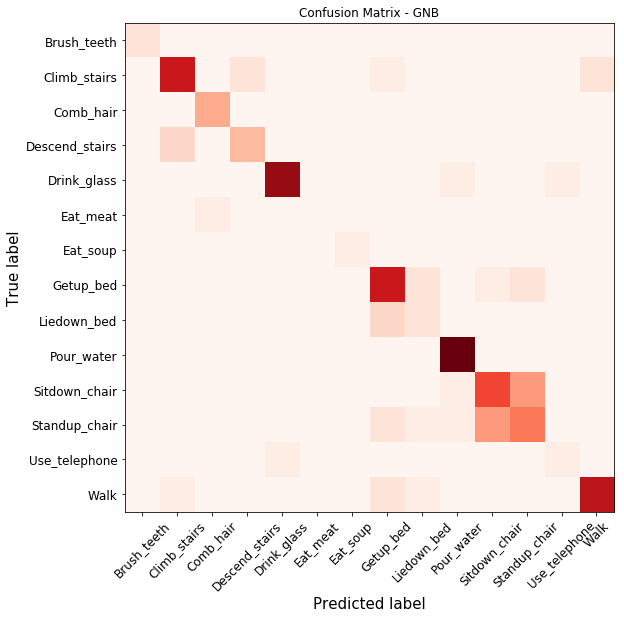

  MNB Accuracy: 0.6545454545454545


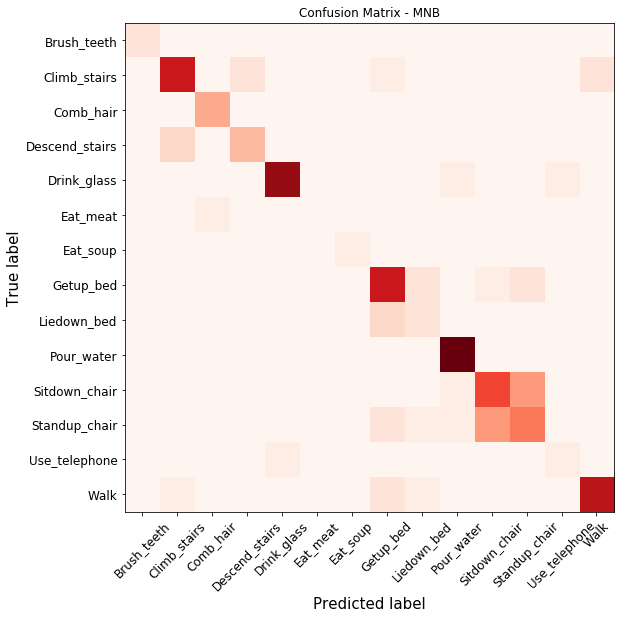

Window Size: 32, K: 120


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  RF Accuracy: 0.7696969696969697


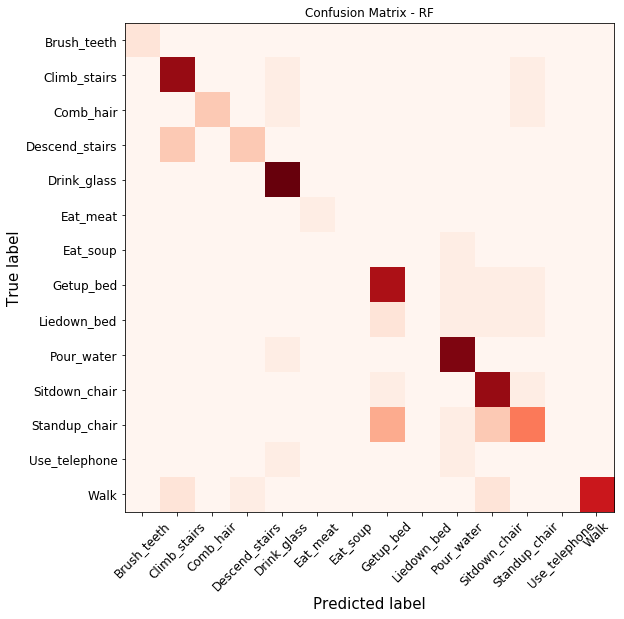

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  SVM Accuracy: 0.7757575757575758


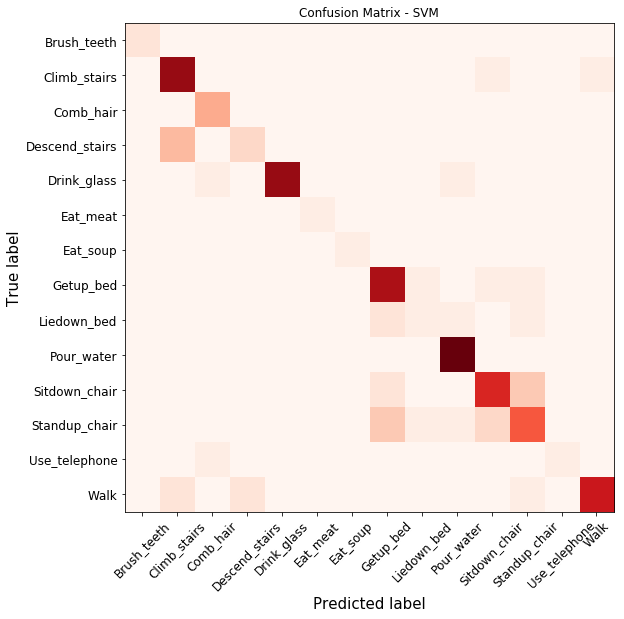

  GNB Accuracy: 0.6


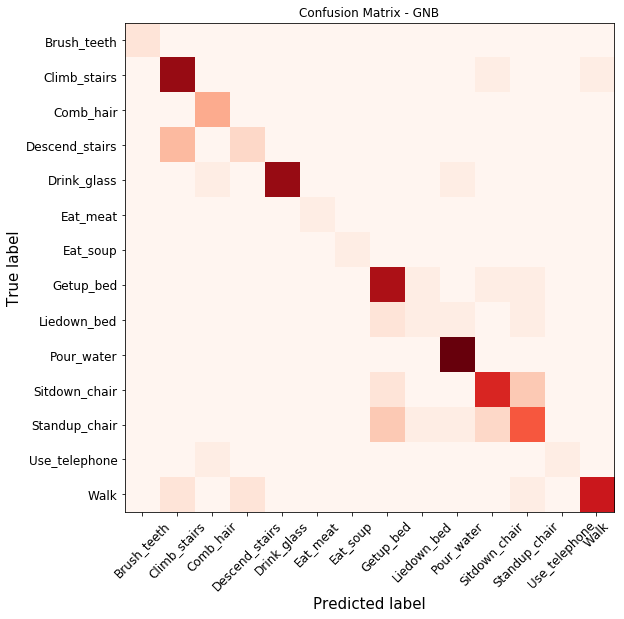

  MNB Accuracy: 0.696969696969697


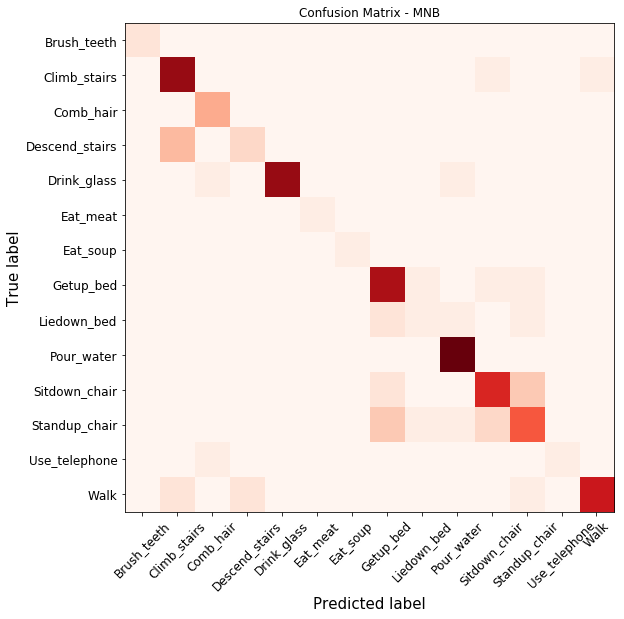

Window Size: 32, K: 125


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  RF Accuracy: 0.7272727272727273


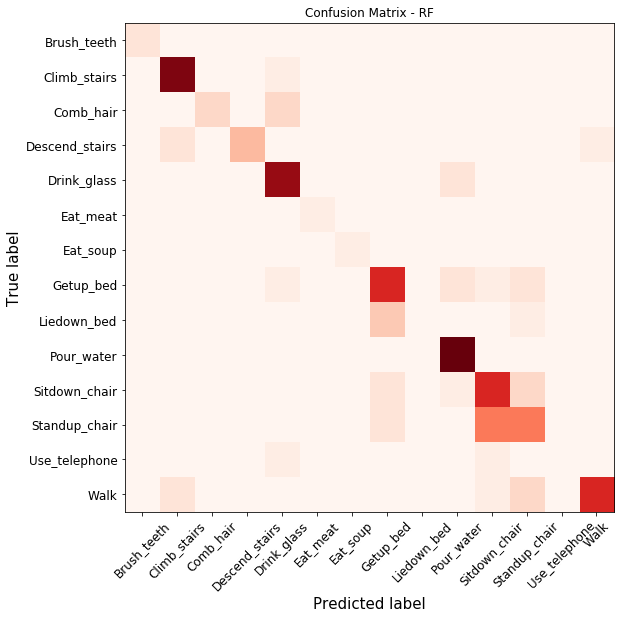

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  SVM Accuracy: 0.8


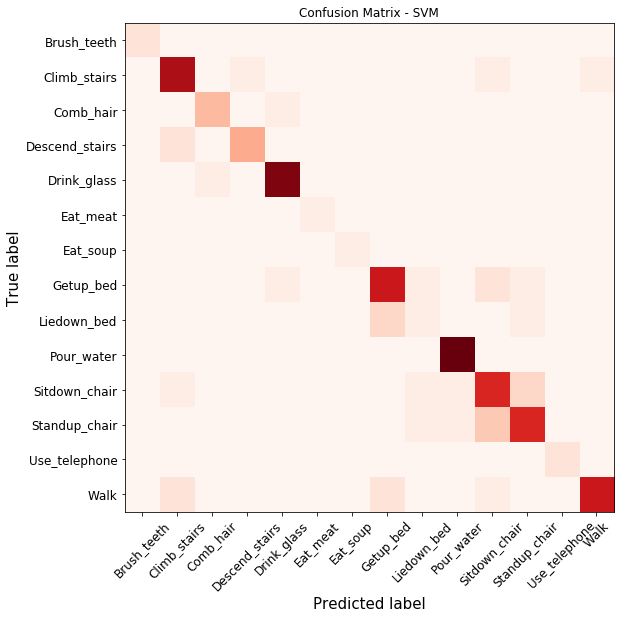

  GNB Accuracy: 0.5515151515151515


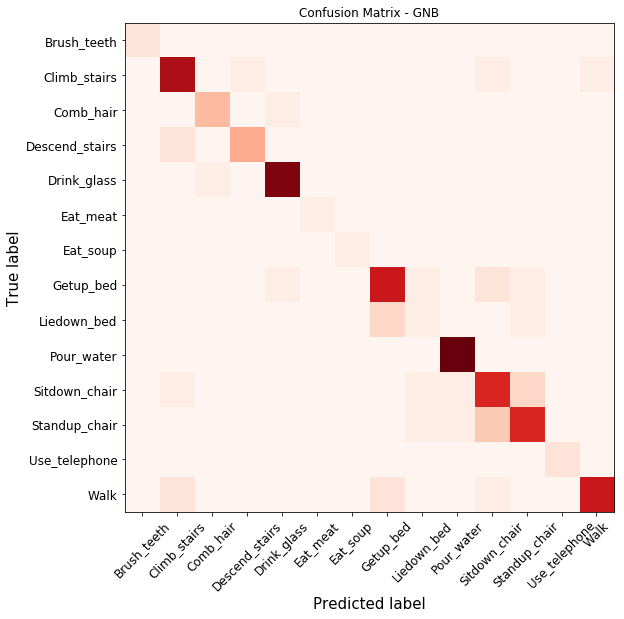

  MNB Accuracy: 0.7090909090909091


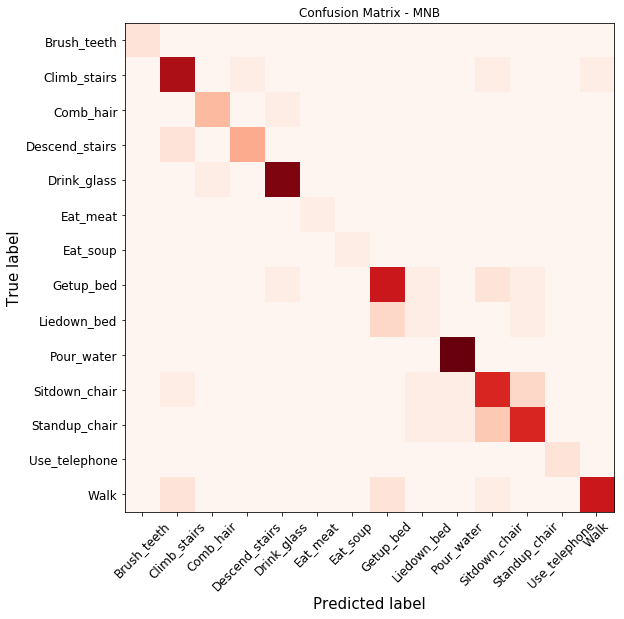

Window Size: 64, K: 110


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  RF Accuracy: 0.7272727272727273


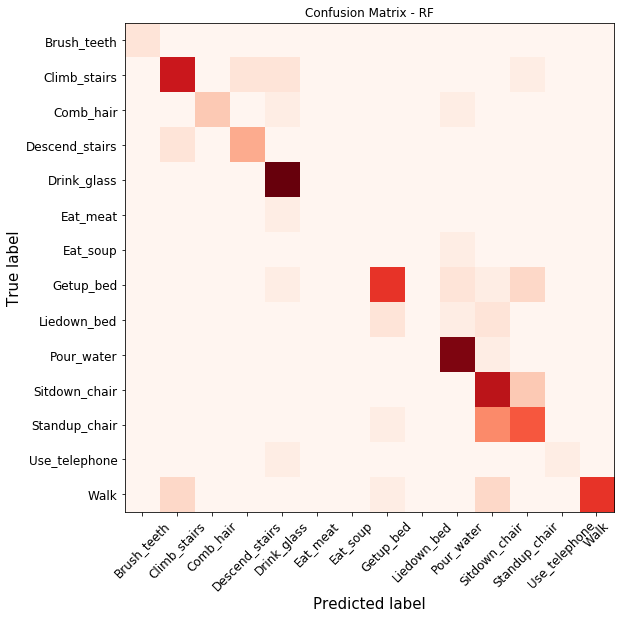

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  SVM Accuracy: 0.8363636363636363


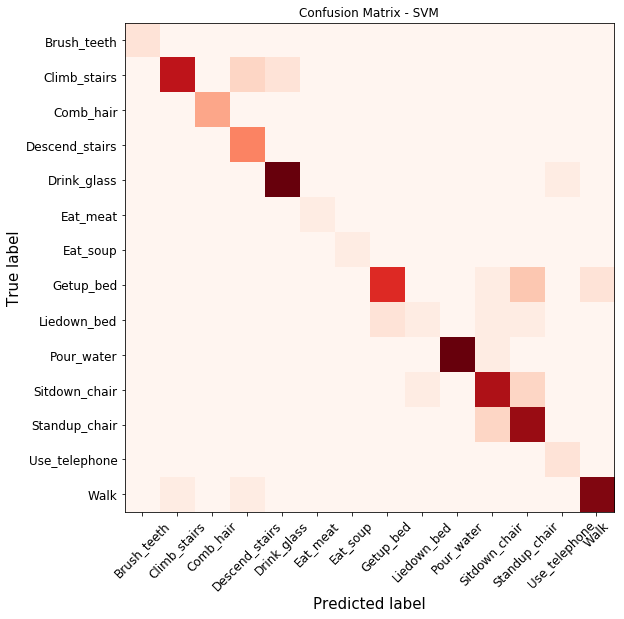

  GNB Accuracy: 0.5696969696969697


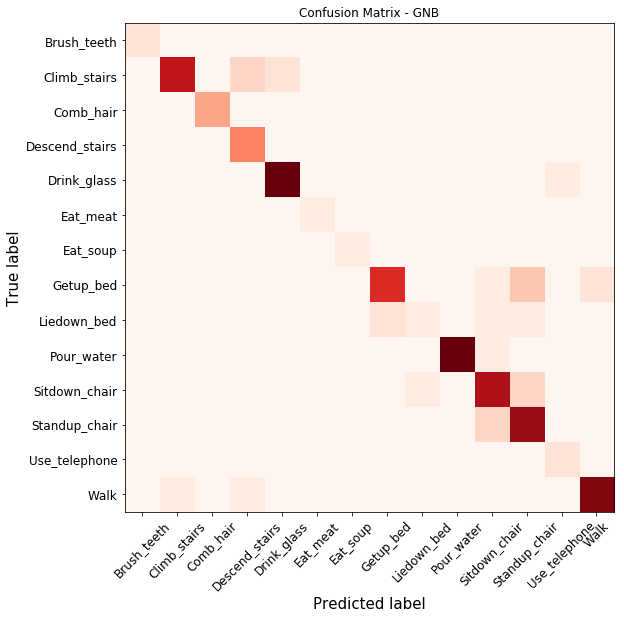

  MNB Accuracy: 0.703030303030303


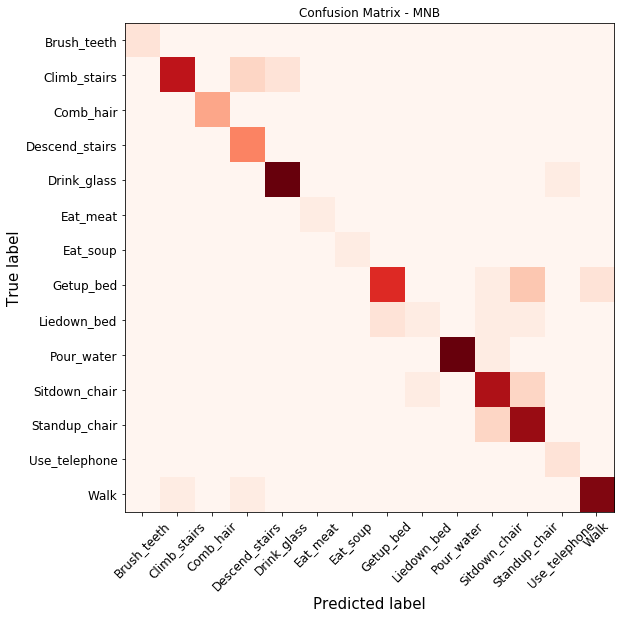

Window Size: 64, K: 115


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  RF Accuracy: 0.703030303030303


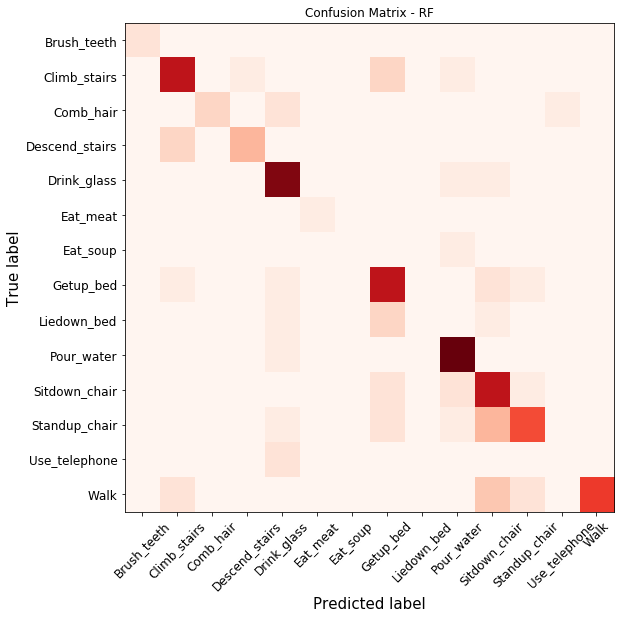

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  SVM Accuracy: 0.8242424242424242


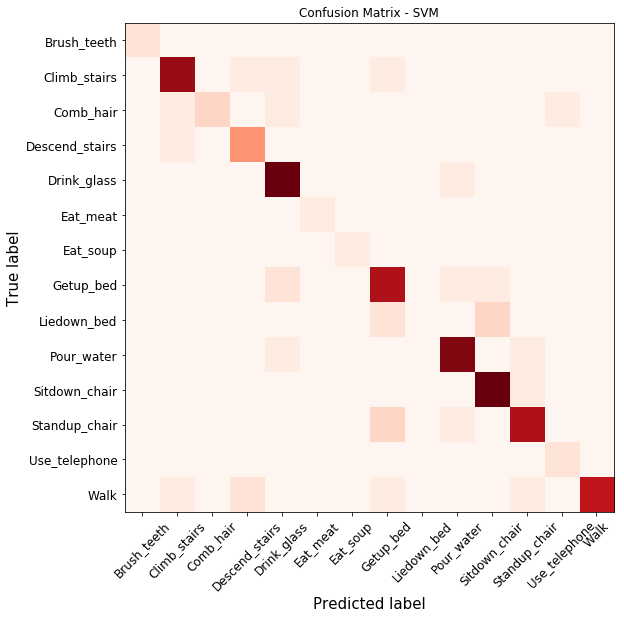

  GNB Accuracy: 0.5696969696969697


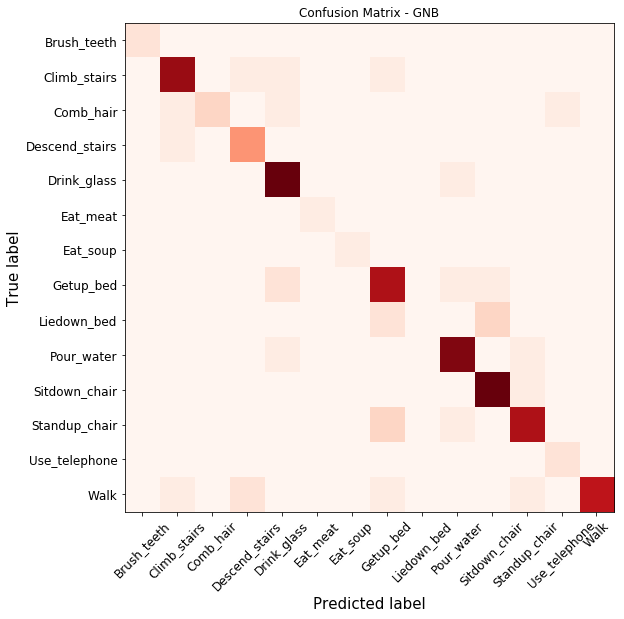

  MNB Accuracy: 0.7090909090909091


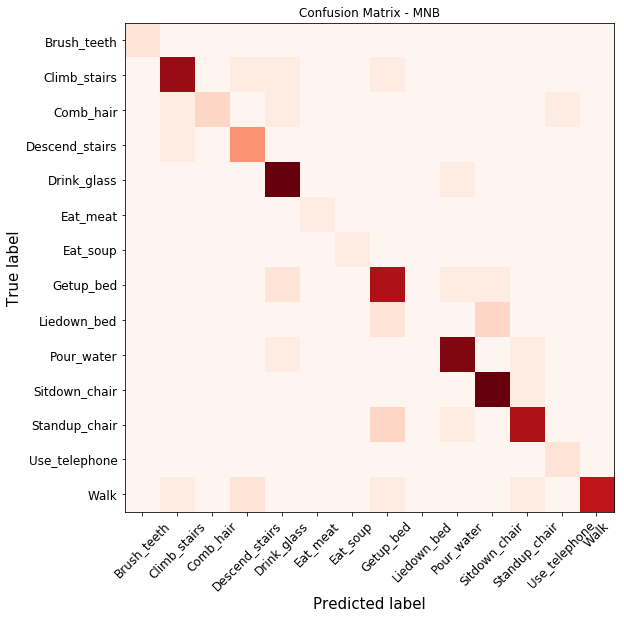

Window Size: 64, K: 120


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  RF Accuracy: 0.7272727272727273


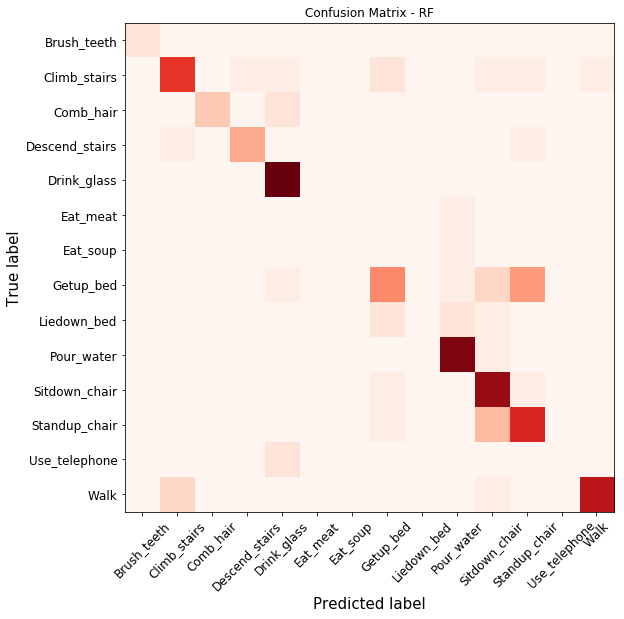

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  SVM Accuracy: 0.806060606060606


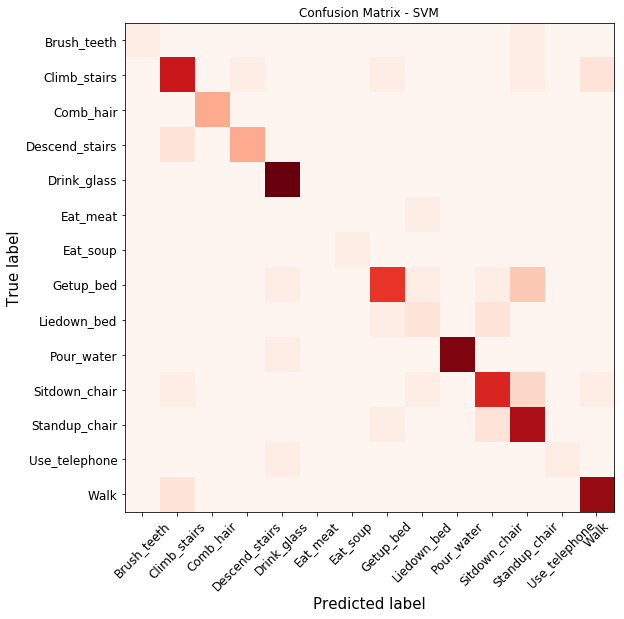

  GNB Accuracy: 0.509090909090909


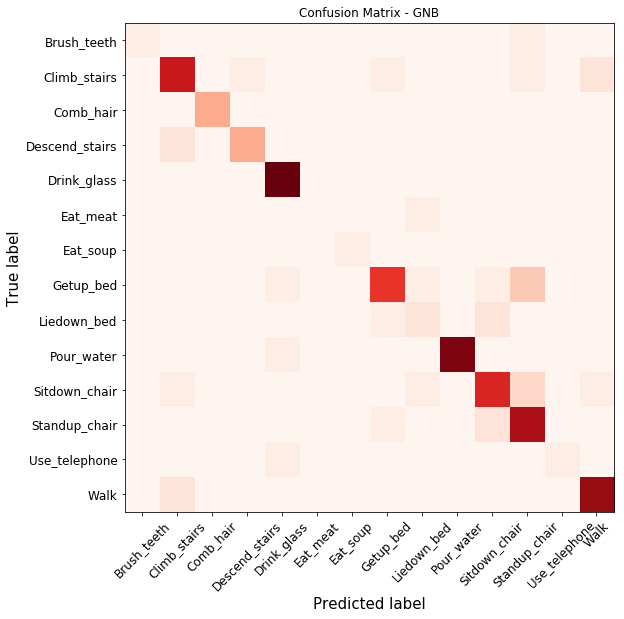

  MNB Accuracy: 0.7333333333333333


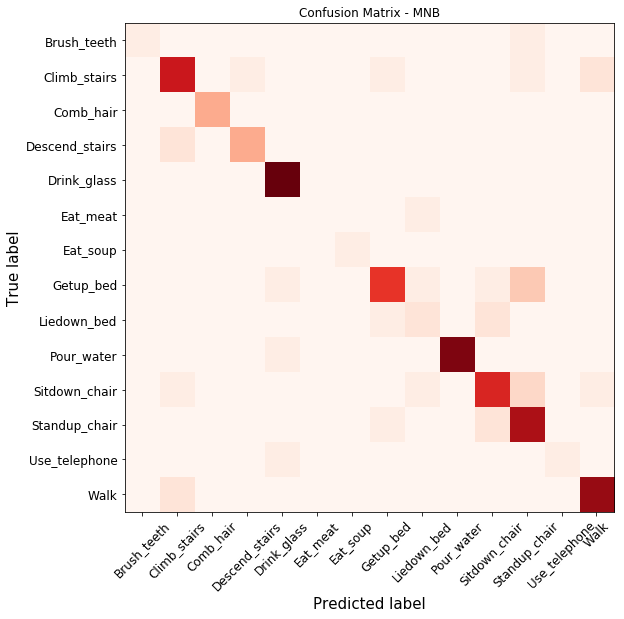

Window Size: 64, K: 125


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  RF Accuracy: 0.6848484848484848


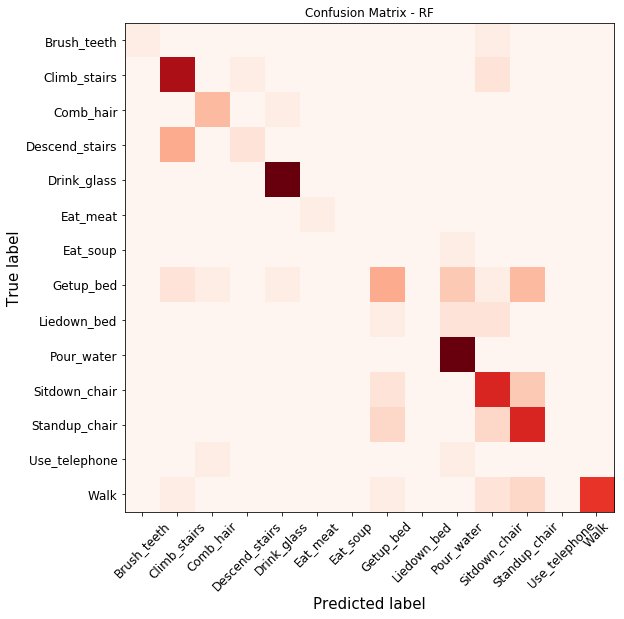

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  SVM Accuracy: 0.7878787878787878


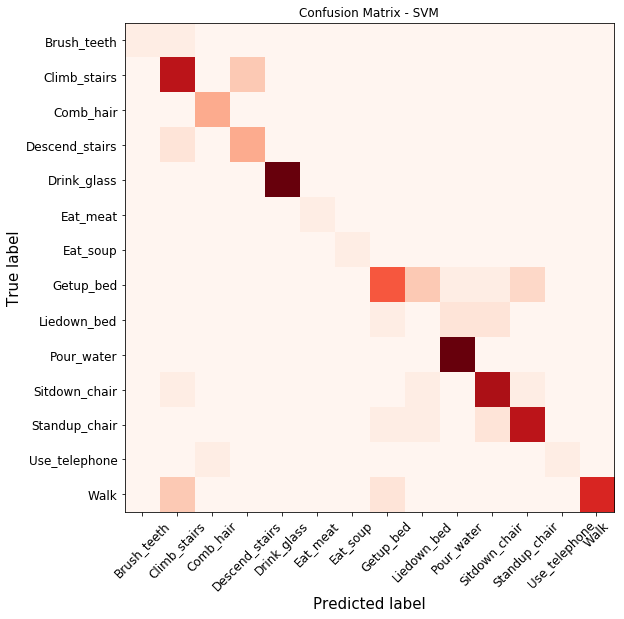

  GNB Accuracy: 0.6363636363636364


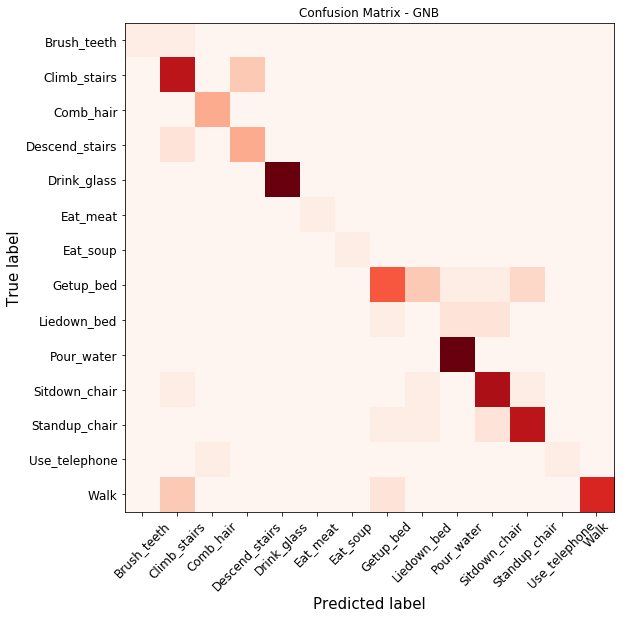

  MNB Accuracy: 0.703030303030303


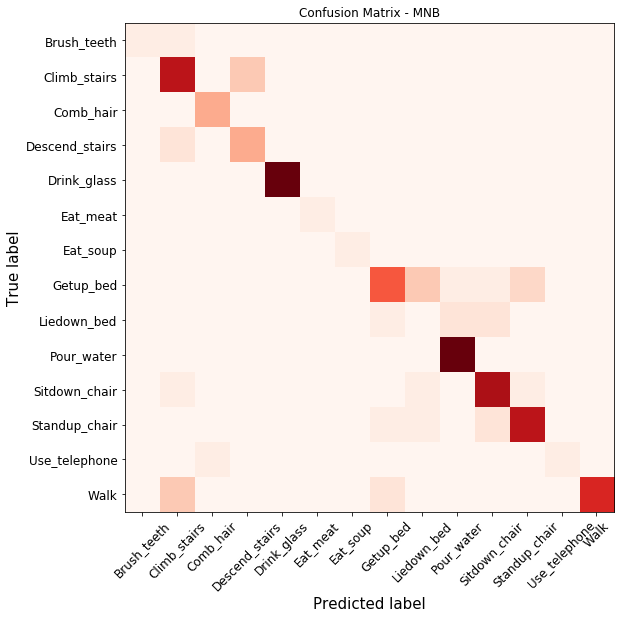

In [9]:
test_score = []
for window in [32, 64]:
    for k in [110, 115, 120, 125]:
        traData, traFrames, tesData, tesFrames, traN, tesN, classList = splitTrainingTest(window, 0.8)
        X_train, y_train, X_test, y_test = vectorQuantization(k, traData, traFrames, tesData, tesFrames, traN, tesN)
        print('Window Size: {}, K: {}'.format(window, k))
        
        rf_param = {'n_estimators':range(500, 701, 100), 'max_depth':range(9,16,3)}
        rf_clf = GridSearchCV(RandomForestClassifier(), rf_param, cv=5, scoring = 'accuracy')
        rf_clf.fit(X_train, y_train)
        rf_pred = rf_clf.best_estimator_.predict(X_test)
        rf_score = accuracy_score(y_test, rf_pred)
        print('  RF Accuracy: {}'.format(rf_score))
        plotConfusionMatrix(y_test, rf_pred, classList, 'RF')
        
        svc_param = {'kernel':['linear','rbf']}
        svc_clf = GridSearchCV(SVC(), svc_param, cv=5, scoring = 'accuracy')
        svc_clf.fit(X_train, y_train)
        svc_pred = svc_clf.best_estimator_.predict(X_test)
        svc_score = accuracy_score(y_test, svc_pred)
        print('  SVM Accuracy: {}'.format(svc_score))
        plotConfusionMatrix(y_test, svc_pred, classList, 'SVM')
        
        gnb_clf = GaussianNB()
        gnb_clf.fit(X_train, y_train)
        gnb_pred = gnb_clf.predict(X_test)
        gnb_score = accuracy_score(y_test, gnb_pred)
        print('  GNB Accuracy: {}'.format(gnb_score))
        plotConfusionMatrix(y_test, svc_pred, classList, 'GNB')
        
        mnb_clf = MultinomialNB()
        mnb_clf.fit(X_train, y_train)
        mnb_pred = mnb_clf.predict(X_test)
        mnb_score = accuracy_score(y_test, mnb_pred)
        print('  MNB Accuracy: {}'.format(mnb_score))
        plotConfusionMatrix(y_test, svc_pred, classList, 'MNB')
        
        test_score.append([rf_score, svc_score, gnb_score, mnb_score])